https://learn.astropy.org/tutorials/1_models-quick-fit.html#authors

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from astroquery.vizier import Vizier
import scipy.optimize

%matplotlib inline

Text(0, 0.5, 'Ks')

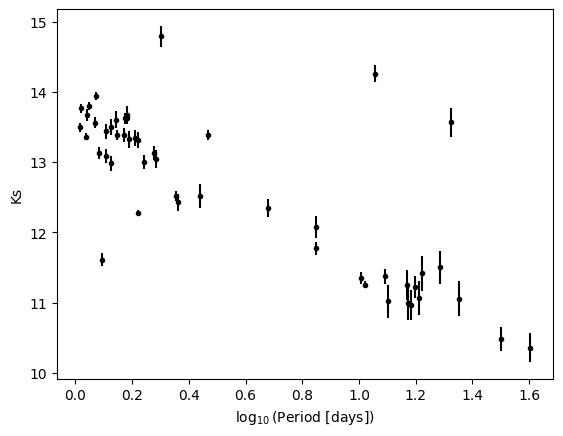

In [3]:
catalog = Vizier.get_catalogs("J/A+A/605/A100")
period = np.array(catalog[0]["Period"])
log_period = np.log10(period)
k_mag = np.array(catalog[0]["<Ksmag>"])
k_mag_err = np.array(catalog[0]["e_<Ksmag>"])

plt.errorbar(log_period, k_mag, k_mag_err, fmt="k.")
plt.xlabel(r"$\log_{10}$(Period [days])")
plt.ylabel("Ks")

In [4]:
model = models.Linear1D()
fitter = fitting.LinearLSQFitter()
best_fit = fitter(model, log_period, k_mag, weights=1.0 / k_mag_err)
print(best_fit)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope            intercept     
    ------------------- ------------------
    -1.8388029852166576 13.517530403506656


Text(0, 0.5, 'Ks')

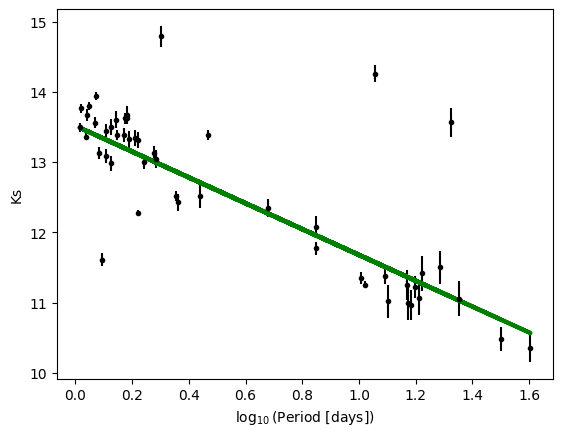

In [5]:
plt.errorbar(log_period, k_mag, k_mag_err, fmt="k.")
plt.plot(log_period, best_fit(log_period), color="g", linewidth=3)
plt.xlabel(r"$\log_{10}$(Period [days])")
plt.ylabel("Ks")

Text(0, 0.5, '$y_1$')

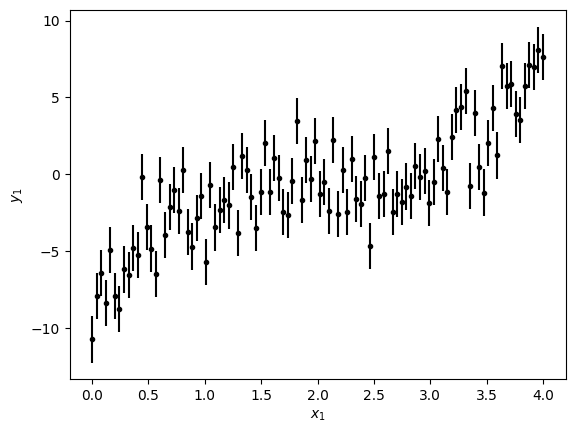

In [6]:
N = 100
x1 = np.linspace(0, 4, N)  # Makes an array from 0 to 4 of N elements
y1 = x1**3 - 6 * x1**2 + 12 * x1 - 9
# Now we add some noise to the data
y1 += np.random.normal(0, 2, size=len(y1))  # One way to add random gaussian noise
sigma = 1.5
y1_err = np.ones(N) * sigma

plt.errorbar(x1, y1, yerr=y1_err, fmt="k.")
plt.xlabel("$x_1$")
plt.ylabel("$y_1$")

In [7]:
model_poly = models.Polynomial1D(degree=3)
fitter_poly = fitting.LinearLSQFitter()
best_fit_poly = fitter_poly(model_poly, x1, y1, weights=1.0 / y1_err)

print(best_fit_poly)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
            c0                 c1                c2                 c3        
    ------------------ ----------------- ------------------ ------------------
    -9.074810091879291 12.80635553727214 -6.540378647537851 1.1014565563365264


In [8]:
fitter_poly_2 = fitting.SimplexLSQFitter()
best_fit_poly_2 = fitter_poly_2(model_poly, x1, y1, weights=1.0 / y1_err)

print(best_fit_poly_2)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
             c0                c1                 c2                  c3        
    ------------------- ---------------- -------------------- ------------------
    -0.6363119027552928 -1.2980568418893 -0.20307958812045343 0.2567065304324506


In [9]:
def calc_reduced_chi_square(fit, x, y, yerr, N, n_free):
    """
    fit (array) values for the fit
    x,y,yerr (arrays) data
    N total number of points
    n_free number of parameters we are fitting
    """
    return 1.0 / (N - n_free) * sum(((fit - y) / yerr) ** 2)

In [10]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_poly(x1), x1, y1, y1_err, N, 4)
print("Reduced Chi Squared with LinearLSQFitter: {}".format(reduced_chi_squared))

reduced_chi_squared = calc_reduced_chi_square(best_fit_poly_2(x1), x1, y1, y1_err, N, 4)
print("Reduced Chi Squared with SimplexLSQFitter: {}".format(reduced_chi_squared))

Reduced Chi Squared with LinearLSQFitter: 1.55808291732277
Reduced Chi Squared with SimplexLSQFitter: 3.892756356480626


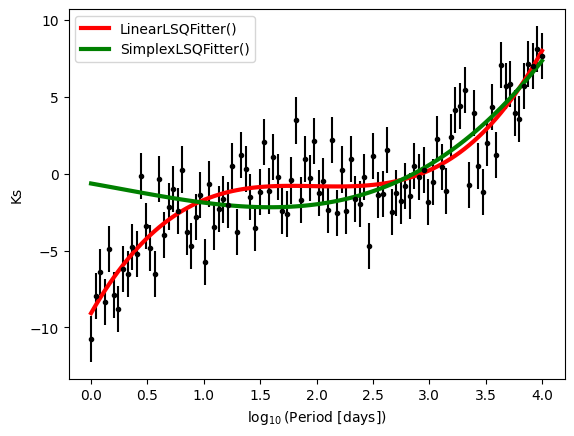

In [11]:
plt.errorbar(x1, y1, yerr=y1_err, fmt="k.")
plt.plot(x1, best_fit_poly(x1), color="r", linewidth=3, label="LinearLSQFitter()")
plt.plot(x1, best_fit_poly_2(x1), color="g", linewidth=3, label="SimplexLSQFitter()")
plt.xlabel(r"$\log_{10}$(Period [days])")
plt.ylabel("Ks")
plt.legend()

Text(0, 0.5, '$y_2$')

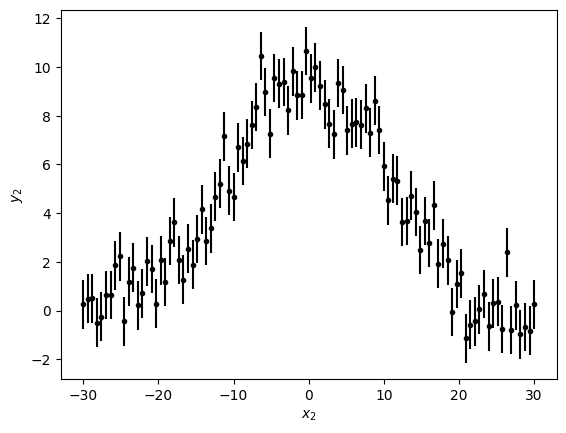

In [12]:
mu, sigma, amplitude = 0.0, 10.0, 10.0
N2 = 100
x2 = np.linspace(-30, 30, N)
y2 = amplitude * np.exp(-((x2 - mu) ** 2) / (2 * sigma**2))
y2 = np.array(
    [y_point + np.random.normal(0, 1) for y_point in y2]
)  # Another way to add random gaussian noise
sigma = 1
y2_err = np.ones(N) * sigma

plt.errorbar(x2, y2, yerr=y2_err, fmt="k.")
plt.xlabel("$x_2$")
plt.ylabel("$y_2$")

In [13]:
model_gauss = models.Gaussian1D()
fitter_gauss = fitting.LevMarLSQFitter()
best_fit_gauss = fitter_gauss(model_gauss, x2, y2, weights=1 / y2_err)

print(best_fit_gauss)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean               stddev      
    ----------------- -------------------- ------------------
    9.609522964590564 -0.16271137069084787 10.132786316957098


In [14]:
model_gauss.param_names

('amplitude', 'mean', 'stddev')

In [15]:
cov_diag = np.diag(fitter_gauss.fit_info["param_cov"])
print(cov_diag)

[0.05067478 0.07507477 0.0753551 ]


In [17]:
print(
    "Amplitude: {} +\\- {}".format(best_fit_gauss.amplitude.value, np.sqrt(cov_diag[0]))
)
print("Mean: {} +\\- {}".format(best_fit_gauss.mean.value, np.sqrt(cov_diag[1])))
print(
    "Standard Deviation: {} +\\- {}".format(
        best_fit_gauss.stddev.value, np.sqrt(cov_diag[2])
    )
)

Amplitude: 9.609522964590564 +\- 0.22511059807020745
Mean: -0.16271137069084787 +\- 0.27399774816420847
Standard Deviation: 10.132786316957098 +\- 0.274508831045858


In [18]:
def f(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2.0 * c**2))

p_opt, p_cov = scipy.optimize.curve_fit(f, x2, y2, sigma=y1_err)
a, b, c = p_opt
best_fit_gauss_2 = f(x2, a, b, c)

print(p_opt)

[ 9.60952307 -0.16271159 10.13278608]


In [19]:
print("Amplitude: {} +\\- {}".format(p_opt[0], np.sqrt(p_cov[0, 0])))
print("Mean: {} +\\- {}".format(p_opt[1], np.sqrt(p_cov[1, 1])))
print("Standard Deviation: {} +\\- {}".format(p_opt[2], np.sqrt(p_cov[2, 2])))

Amplitude: 9.60952307441129 +\- 0.21552469470075908
Mean: -0.1627115865001409 +\- 0.26233016383518143
Standard Deviation: 10.132786081572053 +\- 0.2628195125727735


In [21]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_gauss(x2), x2, y2, y2_err, N2, 3)
print("Reduced Chi Squared using astropy.modeling: {}".format(reduced_chi_squared))

reduced_chi_squared = calc_reduced_chi_square(best_fit_gauss_2, x2, y2, y2_err, N2, 3)
print("Reduced Chi Squared using scipy: {}".format(reduced_chi_squared))

Reduced Chi Squared using astropy.modeling: 0.9166474105865963
Reduced Chi Squared using scipy: 0.9166474105862813


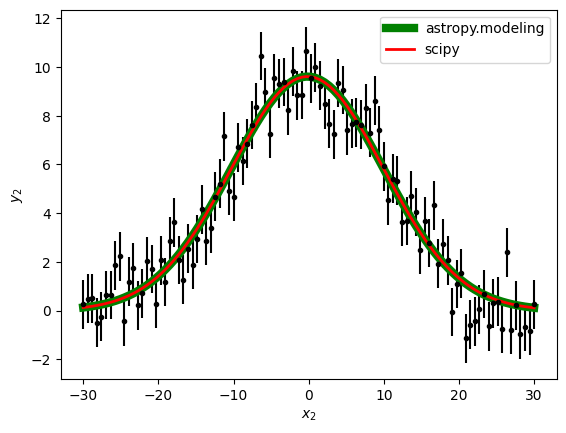

In [22]:
plt.errorbar(x2, y2, yerr=y2_err, fmt="k.")
plt.plot(x2, best_fit_gauss(x2), "g-", linewidth=6, label="astropy.modeling")
plt.plot(x2, best_fit_gauss_2, "r-", linewidth=2, label="scipy")
plt.xlabel("$x_2$")
plt.ylabel("$y_2$")
plt.legend()